# **Harnesing the GTSRB Dataset for Smarter Navigation and Safer Roads**

The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. The benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

### **Authors:**
1. [Gover, Jonathan](mailto:jonathangover@tamu.edu)
2. [Joshi, Neha](mailto:nehayj100@tamu.edu)
3. [Kim, Hwiyoon](mailto:hwiyoonkim@tamu.edu)
4. [Kumar, Adarsh](mailto:adarsh0801@tamu.edu)
5. [Roy, Neil](mailto:neilroy@tamu.edu)


### **Important Links:**
- Dataset URL: [GTSRB](https://benchmark.ini.rub.de/gtsrb_news.html)
- Website/Blog Post: [Demo](https://ecen-gtsrb.streamlit.app/)

<br>

## **Table of Contents:**
1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
  * [Loading the dataset](#loading-the-data)
  * [Exploratory Data Analysis](#data-exploration)
  * [Data Transformations](#data-transformation)
3. [Model Selection](#model-selection)
  * [Algorithm Selection](#algo-selection)
  * [Model Building](#model-building)
  * [Model Evaluation](#model-eval)
4. [Result and Interpretation](#result)
5. [Accessible Work](#work)


---



## **1. Introduction**
<a class="anchor" id="introduction"></a>

### **Problem Statement**
Traffic sign recognition is a critical component of autonomous driving systems and advanced driver assistance systems (ADAS). The challenge lies in accurately classifying traffic signs under various real-world conditions including different lighting, weather, angles, and partial occlusions.

### **Objective**
To develop a robust deep learning model capable of classifying German traffic signs into their correct categories, which can potentially be integrated into autonomous vehicles and driver assistance systems for real-time traffic sign recognition.

### **Proposed Solution:**
To process this dataset, we have used a **Convolutional Neural Network (CNN) with Spatial Self-Attention** mechanism, a model well-suited for image classification tasks. The attention module helps the model focus on the most relevant features of the traffic signs by assigning different weights to different regions of the image, thereby improving the model's ability to handle variations in lighting, orientation, and partial occlusions.

### **Dataset Overview**
The German Traffic Sign Recognition Benchmark (GTSRB) dataset contains:
- Total Classes: 43 different traffic sign categories
- Training Set: 26,640 images
- Test Set: 12,630 images
- Image Properties:
  - Color images in PPM format
  - Varying sizes (15x15 to 250x250 pixels)
  - Real-world images with varying lighting and weather conditions
  - Pre-cropped to contain the traffic sign
- Class Distribution: Unbalanced dataset with some classes having over 2,000 samples while others have fewer than 200 samples


> The dataset is commonly used for benchmarking traffic sign recognition systems and developing computer vision applications in autonomous driving.



---



## **2. Data Preprocessing**
<a class="anchor" id="data-preprocessing"></a>

### 2.1. Loading the data and necessary libraries
<a class="anchor" id="loading-the-data"></a>

In [ ]:
# Downloading skorch
!pip install skorch

# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F
from torchvision.datasets import GTSRB
from collections import Counter
import cv2
import numpy as np
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Image transforms while downloading the dataset
base_transforms = transforms.Compose([
    transforms.Resize((32, 32)), # Cropping images to 32x32
    transforms.ToTensor()
])

# Loading the datasets
train_dataset = GTSRB(root='./data', split='train', download=True, transform=base_transforms)
test_dataset = GTSRB(root='./data', split='test', download=True, transform=base_transforms)

print('Training Dataset Size: ', len(train_dataset))
print('Testing Dataset Size: ', len(test_dataset))

100%|██████████| 187M/187M [00:05<00:00, 32.8MB/s]


Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


100%|██████████| 89.0M/89.0M [00:03<00:00, 28.6MB/s]


Extracting data/gtsrb/GTSRB_Final_Test_Images.zip to data/gtsrb


100%|██████████| 99.6k/99.6k [00:00<00:00, 300kB/s]


Extracting data/gtsrb/GTSRB_Final_Test_GT.zip to data/gtsrb
Training Dataset Size:  26640
Testing Dataset Size:  12630


### 2.2. Exploratory Data Analysis
<a class="anchor" id="data-exploration"></a>



Statistics for Training dataset:
Number of samples: 26640
Mean (RGB channels): tensor([0.3417, 0.3126, 0.3216])
Standard Deviation (RGB channels): tensor([0.1594, 0.1583, 0.1676])
Class Distribution: Counter({1: 1500, 2: 1500, 13: 1440, 12: 1410, 38: 1380, 10: 1350, 4: 1320, 5: 1260, 25: 1020, 9: 990, 3: 960, 7: 960, 8: 960, 11: 900, 18: 810, 35: 810, 17: 750, 14: 540, 31: 540, 33: 480, 15: 420, 26: 420, 23: 360, 28: 360, 6: 300, 16: 300, 30: 300, 34: 300, 22: 270, 36: 270, 20: 240, 21: 240, 40: 240, 39: 210, 24: 180, 27: 180, 29: 180, 32: 180, 41: 180, 42: 180, 0: 150, 19: 150, 37: 150})



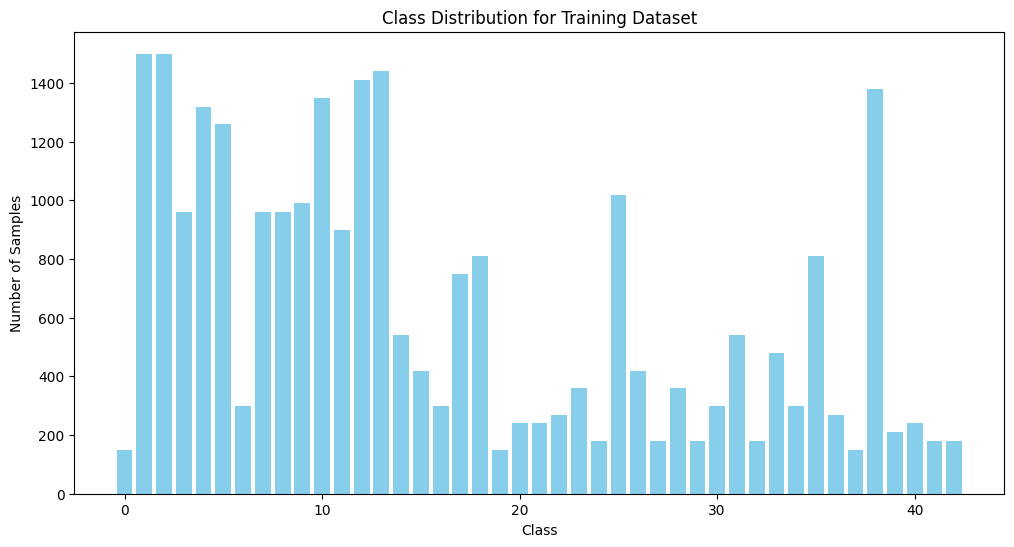



Statistics for Test dataset:
Number of samples: 12630
Mean (RGB channels): tensor([0.3374, 0.3096, 0.3208])
Standard Deviation (RGB channels): tensor([0.1615, 0.1604, 0.1709])
Class Distribution: Counter({2: 750, 1: 720, 13: 720, 38: 690, 12: 690, 4: 660, 10: 660, 5: 630, 25: 480, 9: 480, 7: 450, 3: 450, 8: 450, 11: 420, 18: 390, 35: 390, 17: 360, 14: 270, 31: 270, 33: 210, 15: 210, 26: 180, 16: 150, 23: 150, 30: 150, 28: 150, 6: 150, 34: 120, 22: 120, 36: 120, 21: 90, 20: 90, 24: 90, 29: 90, 40: 90, 39: 90, 42: 90, 27: 60, 32: 60, 41: 60, 19: 60, 0: 60, 37: 60})



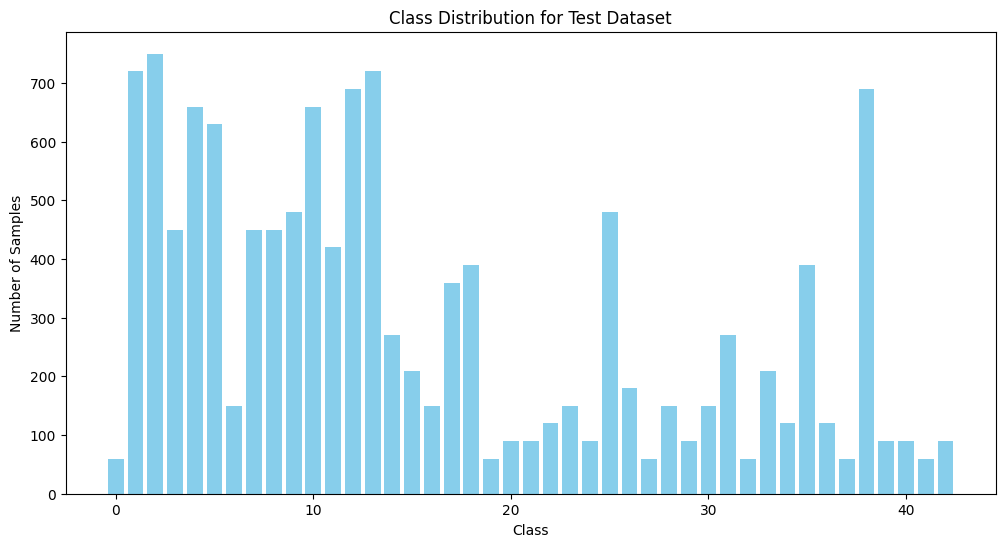

In [ ]:
# Function to generate mean and standard deviation for images by pixels
def get_dataset_statistics(dataset):
    """
    Calculates the mean, standard deviation, and class distribution for a given dataset.

    Parameters:
      dataset: A PyTorch dataset object.

    Returns:
      A dictionary containing the following statistics:
        num_samples, mean, std, class_distribution
    """

    labels = []
    num_samples = len(dataset)
    pixel_means = []
    pixel_stds = []

    # Iterate through the dataset
    for img, label in dataset:
        labels.append(label)
        # Calculate pixel mean and std for the image
        img_mean = torch.mean(img, dim=(1, 2))
        img_std = torch.std(img, dim=(1, 2))
        pixel_means.append(img_mean)
        pixel_stds.append(img_std)

    # Class distribution
    label_counts = Counter(labels)

    # Combining mean and standar deviation for all images
    all_means = torch.stack(pixel_means)
    all_stds = torch.stack(pixel_stds)

    # Calculate overall dataset statistics
    overall_mean = torch.mean(all_means, dim=0)
    overall_std = torch.mean(all_stds, dim=0)

    return {
        "num_samples": num_samples,
        "class_distribution": label_counts,
        "mean": overall_mean,
        "std": overall_std,
    }

# Display statistics
def display_statistics(stats, dataset_name):
  """
  Print the statistics for a given dataset.

  Parameters:
    stats (dict): A python dictionary having num_samples, class_distribution, mean, and std
    dataset_name (str): Name of the dataset

  Returns:
    None
  """
  print(f"\n\nStatistics for {dataset_name} dataset:")
  print(f"Number of samples: {stats['num_samples']}")
  print(f"Mean (RGB channels): {stats['mean']}")
  print(f"Standard Deviation (RGB channels): {stats['std']}")
  print(f"Class Distribution: {stats['class_distribution']}")
  print()

# Visualize class distribution
def plot_class_distribution(stats, dataset_name):
    """
    Plots the Class Distribution for a given dataset.

    Parameters:
      stats (dict): A python dictionary having num_samples, class_distribution, mean, and std
      dataset_name (str): Name of the dataset

    Returns:
      None
    """
    class_counts = stats["class_distribution"]
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.title(f"Class Distribution for {dataset_name} Dataset")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.show()


# Get the num_samples, class distribution, Mean and Standard Deviation for dataset
train_stats = get_dataset_statistics(train_dataset)
test_stats = get_dataset_statistics(test_dataset)

# Display and plot the training dataset statistics
display_statistics(train_stats, "Training")
plot_class_distribution(train_stats, "Training")

# Display and plot the testing dataset statistics
display_statistics(test_stats, "Test")
plot_class_distribution(test_stats, "Test")

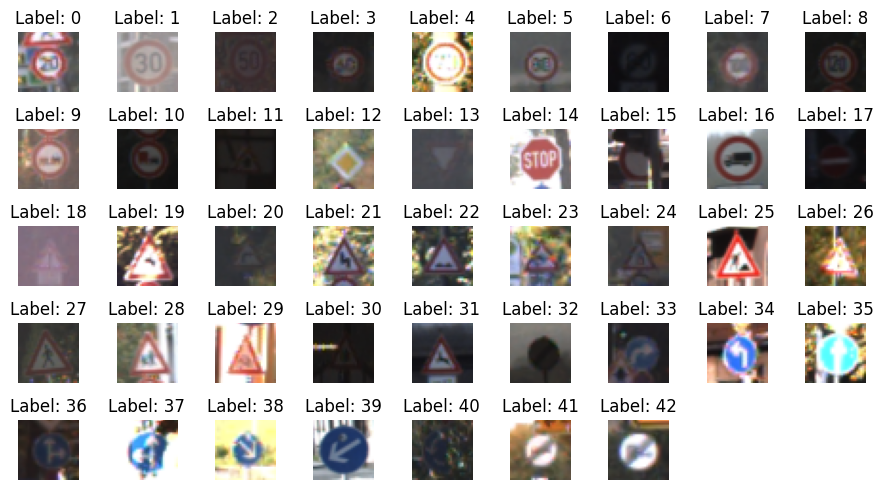

In [ ]:
def visualize_examples(dataset, rows=5, cols=9):
    """
      Plots the images from the given dataset for each class.

      Parameters:
        dataset_name (str): Name of the dataset
        rows (int): Number of rows in the plot
        cols (int): Number of columns in the plot (images per row)

      Returns:
        None
      """
    num_images = rows * cols  # Total images to display
    fig, axes = plt.subplots(rows, cols, figsize=(cols, rows))  # Adjust figure size
    axes = axes.ravel()  # Flatten the grid of axes for easy indexing

    # Create a dictionary to store images by label
    label_to_images = {}
    for idx in range(len(dataset)):
        img, label = dataset[idx]
        if label not in label_to_images:
            label_to_images[label] = []
        label_to_images[label].append((img, idx))

    # Display images in label order
    current_index = 0
    for label in sorted(label_to_images.keys()):
        if current_index >= num_images:
            break
        # Get first image for this label
        img, _ = label_to_images[label][0]

        # Convert the image tensor back to NumPy for plotting
        img = img.permute(1, 2, 0).numpy()

        # Display the image
        axes[current_index].imshow(img)
        axes[current_index].set_title(f"Label: {label}")
        axes[current_index].axis('off')  # Turn off axis ticks/labels
        current_index += 1

    # Hide any remaining empty subplots (if applicable)
    for j in range(current_index, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize examples from the training dataset
visualize_examples(train_dataset)

Dataset has 26640 training samples(after splitting into trainging and validation).
Overall mean per channel (RGB): tensor([0.3417, 0.3126, 0.3216])
Overall std per channel (RGB): tensor([0.1594, 0.1583, 0.1676])


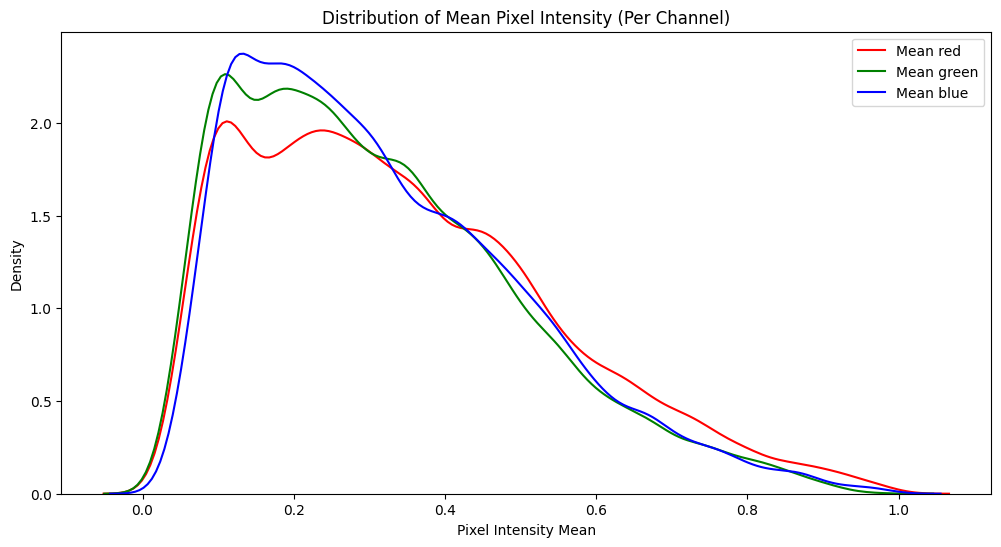

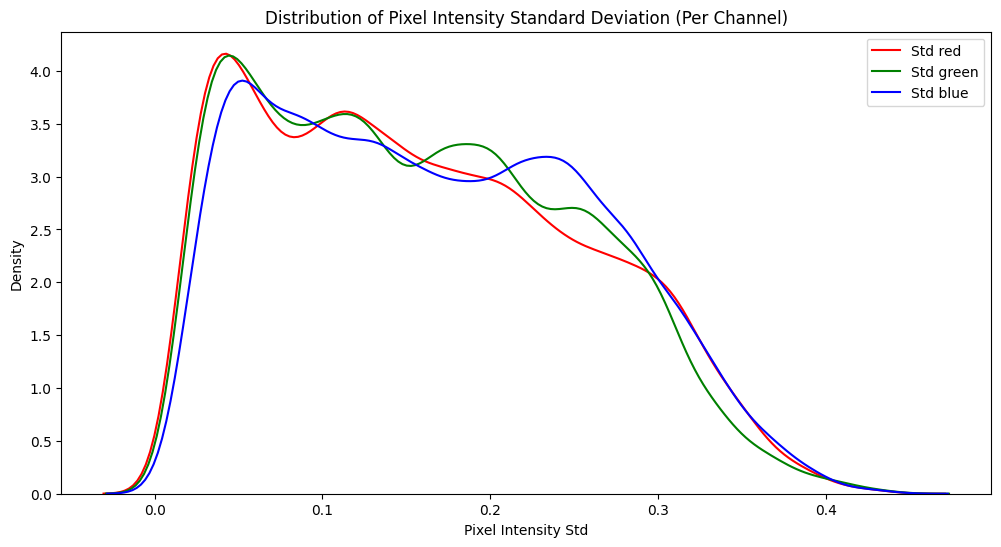

In [ ]:
# Helper function for detailed EDA
def extended_eda(dataset):
    """
    Plots the Pixel Intensity Mean and Pixel Intensity Standard Deviation for a given dataset.

    Parameters:
      dataset_name (str): Name of the dataset

    Returns:
      None
    """

    print(f"Dataset has {len(dataset)} training samples(after splitting into trainging and validation).")

    # Initializing containers for storing final result
    all_labels = []
    all_means = []
    all_stds = []

    for img, label in dataset:
        all_labels.append(label)
        img_mean = torch.mean(img, dim=(1, 2))  # Mean per channel
        img_std = torch.std(img, dim=(1, 2))   # Std per channel
        all_means.append(img_mean)
        all_stds.append(img_std)

    # Pixel statistics
    all_means = torch.stack(all_means)
    all_stds = torch.stack(all_stds)
    overall_mean = torch.mean(all_means, dim=0)
    overall_std = torch.mean(all_stds, dim=0)
    print(f"Overall mean per channel (RGB): {overall_mean}")
    print(f"Overall std per channel (RGB): {overall_std}")

    # Visualize pixel mean and std distributions
    plt.figure(figsize=(12, 6))
    for i, color in enumerate(['red', 'green', 'blue']):
        sns.kdeplot(all_means[:, i].numpy(), label=f'Mean {color}', color=color)
    plt.title("Distribution of Mean Pixel Intensity (Per Channel)")
    plt.xlabel("Pixel Intensity Mean")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
    print('\n\n')
    plt.figure(figsize=(12, 6))
    for i, color in enumerate(['red', 'green', 'blue']):
        sns.kdeplot(all_stds[:, i].numpy(), label=f'Std {color}', color=color)
    plt.title("Distribution of Pixel Intensity Standard Deviation (Per Channel)")
    plt.xlabel("Pixel Intensity Std")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Perform EDA on the training dataset
extended_eda(train_dataset)

### 2.3. Data Transformations and Data Splitting
<a class="anchor" id="data-transformation"></a>

**Dataset Transformation:**<br>
The image preprocessing pipeline incorporates several techniques to enhance model performance.
- Images are resized to a uniform 44x42 pixels.
- After that the images are transformed to Grayscale.
- Next, CLAHE is applied, followed by Sharpening the images.


**Dataset Split:**<br>
We have splited the dataset into 3 parts - Train, Validation and Test.
- Training Set: 80% of the original training data for model training
- Validation Set: 20% of the original training data for model evaluation during training
- Testing Set: Separate help-out data for final model evaluation

In [ ]:
# Image transforms after performing EDA
# Define the custom preprocessing transform
def custom_preprocessing(image):
    # Convert to grayscale
    image_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    # Resize to (44, 42)
    resized_image = cv2.resize(image_gray, (44, 42))

    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(resized_image)

    # Sharpen the image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened = cv2.filter2D(clahe_image, -1, kernel)

    # Convert back to PIL Image for compatibility
    return transforms.functional.to_pil_image(sharpened)

# Define a custom transform
adv_transform = transforms.Compose([
    transforms.Lambda(lambda img: custom_preprocessing(img)),
    transforms.Lambda(lambda img: transforms.functional.to_tensor(img)),  # Convert to tensor
])

# Loading the datasets
train_dataset = GTSRB(root='./data', split='train', download=True, transform=adv_transform)
test_dataset = GTSRB(root='./data', split='test', download=True, transform=adv_transform)
train_dataset, val_dataset = random_split(train_dataset, [int(0.8 * len(train_dataset)), int(0.2 * len(train_dataset))])

print('Training Dataset Size: ', len(train_dataset))
print('Validation Dataset Size: ', len(val_dataset))
print('Testing Dataset Size: ', len(test_dataset))

Training Dataset Size:  21312
Validation Dataset Size:  5328
Testing Dataset Size:  12630


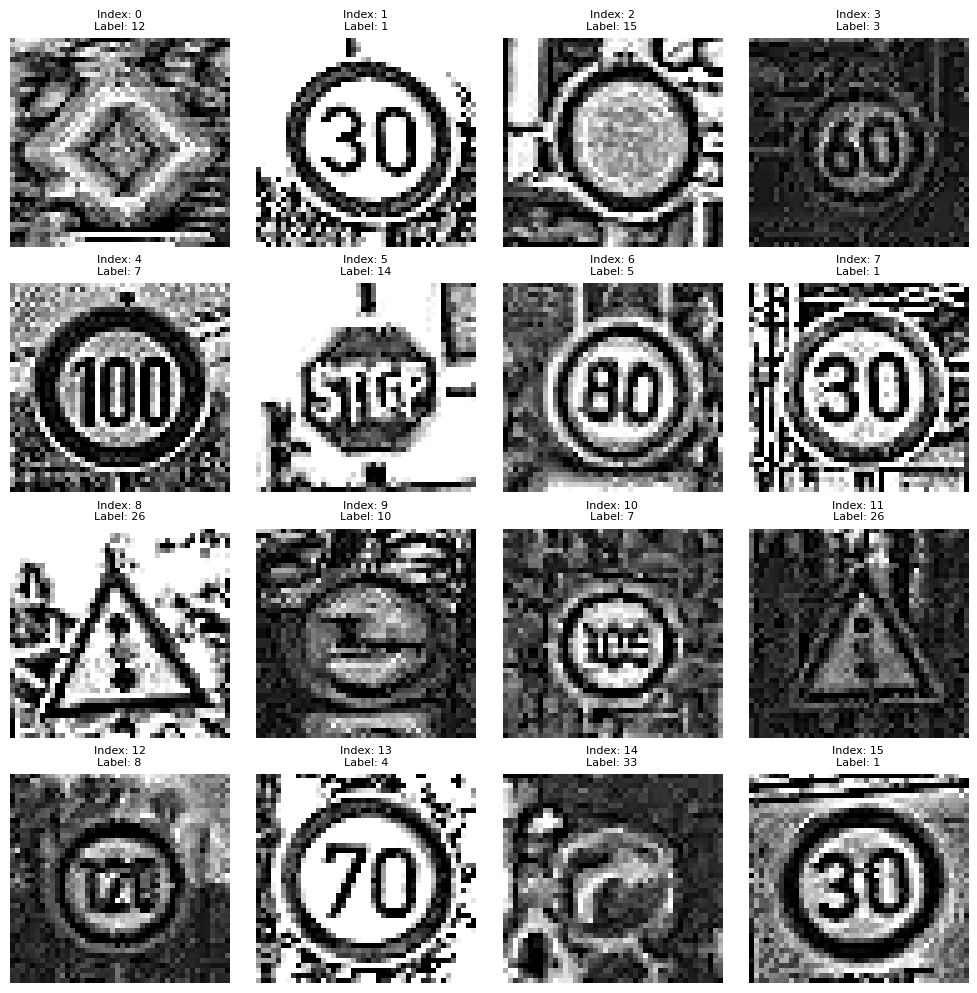

In [ ]:
# Creatig a training dataloader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

# Helper function to unnormalize and plot images
def imshow(img):
    mean = np.array([0.3423, 0.3132, 0.3224])
    std = np.array([0.1597, 0.1586, 0.1679])
    img = img.numpy()
    mean = mean[0]
    std = std[0]
    img = img[0]
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Get a batch of images, labels, and indices
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Get dataset indices for the current batch
batch_indices = list(range(len(train_dataset)))[:len(images)]  # Track the first few indices

# Display images with indices
plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(4, 4, i+1)
    imshow(images[i])
    plt.title(f"Index: {batch_indices[i]}\nLabel: {labels[i].item()}", fontsize=8)
plt.tight_layout()
plt.show()

# 3. Model Selection
<a class="anchor" id="model-selection"></a>

## 3.1. Algorithm Selection
<a class="anchor" id="algo-selection"></a>
We have selected **CNN with a Spatial Self-Attention** module for the following reasons:
- CNNs excel at learning hierarchical visual features essential for traffic sign recognition.
- The spatial self-attention mechanism enhances the model's ability to focus on *discriminative regions* of traffic signs, particularly useful for handling variations in lighting, orientation, and partial occlusions.
- The combination allows the model to adaptively weight important spatial features while maintaining the structural information critical for traffic sign classification.


## 3.2. Model Building
<a class="anchor" id="model-building"></a>
The model architecture incorporates:
- A CNN skeleton for feature extraction
- A spatial self-attention module that computes attention weights using query, key, and value transformations.


In [ ]:
# Self attention module for GTSRB Classifier Class
class SelfAttention(nn.Module):
    def __init__(self, in_channels):
        super(SelfAttention, self).__init__()
        self.query = nn.Conv2d(in_channels, in_channels//8, 1)
        self.key = nn.Conv2d(in_channels, in_channels//8, 1)
        self.value = nn.Conv2d(in_channels, in_channels, 1)
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        batch_size, channels, height, width = x.size()

        # Creating projections
        query = self.query(x).view(batch_size, -1, height * width).permute(0, 2, 1)
        key = self.key(x).view(batch_size, -1, height * width)
        value = self.value(x).view(batch_size, -1, height * width)
        attention = torch.bmm(query, key)
        attention = F.softmax(attention, dim=-1)

        # Applying attention to value
        out = torch.bmm(value, attention.permute(0, 2, 1))
        out = out.view(batch_size, channels, height, width)

        # Adding the residual connections
        return self.gamma * out + x

In [ ]:
class GTSRBModelWithAttention(nn.Module):
    def __init__(self):
        super(GTSRBModelWithAttention, self).__init__()

        # Building 3 deep convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        # Creating 2 Attention layers after 2nd and 3rd convolutional layer
        self.attention1 = SelfAttention(64)
        self.attention2 = SelfAttention(128)

        # Pooling layer
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate the size of flattened features
        # After 3 pooling layers: 32x32 -> 16x16 -> 8x8 -> 4x4
        self.flatten_size = self._get_flatten_size((1, 42, 44))

        # Building fully connected layers
        self.fc1 = nn.Linear(self.flatten_size, 512)
        self.bn4 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 43)

        # Adding a dropout layer
        self.dropout = nn.Dropout(0.5)

    def _get_flatten_size(self, input_shape):
        """Helper function to compute the flattened size."""
        with torch.no_grad():
            x = torch.zeros(1, *input_shape)
            x = self.pool(F.relu(self.bn1(self.conv1(x))))
            x = self.pool(F.relu(self.bn2(self.conv2(x))))
            x = self.pool(F.relu(self.bn3(self.conv3(x))))
        return x.numel()

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.attention1(x)
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.attention2(x)
        x = x.view(-1, self.flatten_size)
        x = self.dropout(F.relu(self.bn4(self.fc1(x))))
        x = self.fc2(x)
        return x

In [ ]:
# Wrapper class to perform Grid Search CV
class GTSRBWrapper(NeuralNetClassifier):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def get_loss(self, y_pred, y_true, *args, **kwargs):
        y_true = y_true.to(y_pred.device)
        return nn.CrossEntropyLoss()(y_pred, y_true)

In [ ]:
# function to perfrom grid search
def perform_grid_search(X_train, y_train):
    net = GTSRBWrapper(
        module=GTSRBModelWithAttention,
        criterion=nn.CrossEntropyLoss,
        optimizer=optim.Adam,
        device='cuda' if torch.cuda.is_available() else 'cpu',
        train_split=None,
        verbose=1
    )
    param_grid = {
        'lr': [0.001, 0.0001],
        'max_epochs': [10, 20, 30],
        'batch_size': [32, 64]
    }

    grid_search = GridSearchCV(
        estimator=net,
        param_grid=param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )

    # Perform grid search
    grid_search.fit(X_train, y_train)

    # Print results
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("\n*************************Starting Training*************************\n")

    return grid_search.best_params_

In [ ]:
# Lists to store loss and accuracy for training and testing dataset
train_losses_sa, val_losses_sa = [], []
train_accuracies_sa, val_accuracies_sa = [], []
all_preds_sa, all_labels_sa = [], []

# function for training/validating the model
def train_model(model, train_loader, val_loader, num_epochs, optimizer):
    """
    Performs training of the model and evaluate it on validatio dataset

    Parameters:
      model : Classifier Model used
      train_loader : Training DataLoader
      val_loader : Validation DataLoader
      num_epochs : Number of epochs
      optimizer : Optimizer

    Returns:
      None
    """
    # Storing model on GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Initializing the Cross Entropy Loss and Adam Optimizer
    criterion = nn.CrossEntropyLoss()
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

    best_val_acc = 0.0

    # running the model for best number of epochs
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()

                all_preds_sa.extend(predicted.cpu().numpy())
                all_labels_sa.extend(labels.cpu().numpy())

        # Calculate metrics
        train_loss = running_loss / len(train_loader)
        val_loss = val_loss / len(val_loader)
        train_acc = 100. * correct / total
        val_acc = 100. * val_correct / val_total
        train_losses_sa.append(train_loss)
        val_losses_sa.append(val_loss)
        train_accuracies_sa.append(train_acc)
        val_accuracies_sa.append(val_acc)

        precision = precision_score(all_labels_sa, all_preds_sa, average='weighted')
        recall = recall_score(all_labels_sa, all_preds_sa, average='weighted')
        f1 = f1_score(all_labels_sa, all_preds_sa, average='weighted')

        # Save best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), 'best_model_sa.pth')

        # Print metrics
        print(f'Epoch [{epoch+1}/{num_epochs}]')
        print(f'Training Loss: {train_loss:.3f}')
        print(f'Training Accuracy: {train_acc:.2f}%')
        print(f'Validation Accuracy: {val_acc:.2f}%')
        print(f'Best Validation Accuracy: {best_val_acc:.2f}%')
        print(f'Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}')
        print('--------------------')

        scheduler.step(val_loss)

In [ ]:
# 'main' function to handle the execution of program
def main():
    # Convert dataset to numpy arrays for GridSearchCV
    train_loader = DataLoader(train_dataset,
                              batch_size=len(train_dataset),shuffle=True,
                              num_workers=4,
                              drop_last=True)

    X_train, y_train = next(iter(train_loader))
    X_train = X_train.numpy()
    y_train = y_train.numpy()

    # Perform grid search
    best_params = perform_grid_search(X_train, y_train)

    # Create data loaders with best batch size
    train_loader = DataLoader(
        train_dataset,
        batch_size=best_params['batch_size'],
        shuffle=True,
        num_workers=4,
        drop_last=True
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=best_params['batch_size'],
        shuffle=False,
        num_workers=4,
        drop_last=True
    )

    # Initialize model with best parameters
    model = GTSRBModelWithAttention()
    optimizer = optim.Adam(
        model.parameters(),
        lr=best_params['lr']
    )

    # Train model with best parameters
    train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=best_params['max_epochs'],
        optimizer=optimizer
    )

if __name__ == '__main__':
    main()

  epoch    train_loss     dur
-------  ------------  ------
      1        0.4084  3.7024
      2        0.0273  2.9847
      3        0.0081  2.9871
      4        0.0023  3.0846
      5        0.0013  3.3042
      6        0.0053  2.9776
      7        0.0361  2.9699
      8        0.0093  2.9792
      9        0.0024  3.2882
     10        0.0009  3.0610
     11        0.0006  2.9664
     12        0.0004  2.9707
     13        0.0004  3.1722
     14        0.0296  3.1641
     15        0.0169  2.9793
     16        0.0063  2.9723
     17        0.0018  3.0671
     18        0.0009  3.2417
     19        0.0006  2.9745
     20        0.0003  2.9867
     21        0.0002  2.9709
     22        0.0002  3.3339
     23        0.0173  2.9848
     24        0.0096  2.9775
     25        0.0031  2.9702
     26        0.0031  3.1974
     27        0.0020  3.1339
     28        0.0018  2.9791
     29        0.0025  2.9962
     30        0.0025  3.0884
Best parameters: {'batch_size': 64, 'lr'

### 3.3. Model Evaluation
<a class="anchor" id="model-eval"></a>


In [ ]:
# function for evaluting the model on test dataset
def test_model(model, test_loader):
    """
    Evaluate the final model on the test dataset

    Parameters:
      model : Classifier Model used
      test_loader : Testing DataLoader

    Returns:
      None
    """

    # Storing model on GPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    # Vars to store intermediate results
    test_correct = 0
    test_total = 0
    all_preds = []
    all_labels = []

    # Initializing the Cross Entropy Loss
    criterion = nn.CrossEntropyLoss()
    test_loss = 0.0

    # Testing phase
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            test_total += labels.size(0)
            test_correct += predicted.eq(labels).sum().item()

            # Store predictions and labels for metrics calculation
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate metrics
    test_accuracy = 100. * test_correct / test_total
    test_loss = test_loss / len(test_loader)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')

    # Creating confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Print results
    print("Test Set Results:")
    print(f"Test Loss: {test_loss:.3f}")
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")

    # Plot confusion matrix
    print("\n\nConfusion Matrix:\n")
    plt.figure(figsize=(16, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return

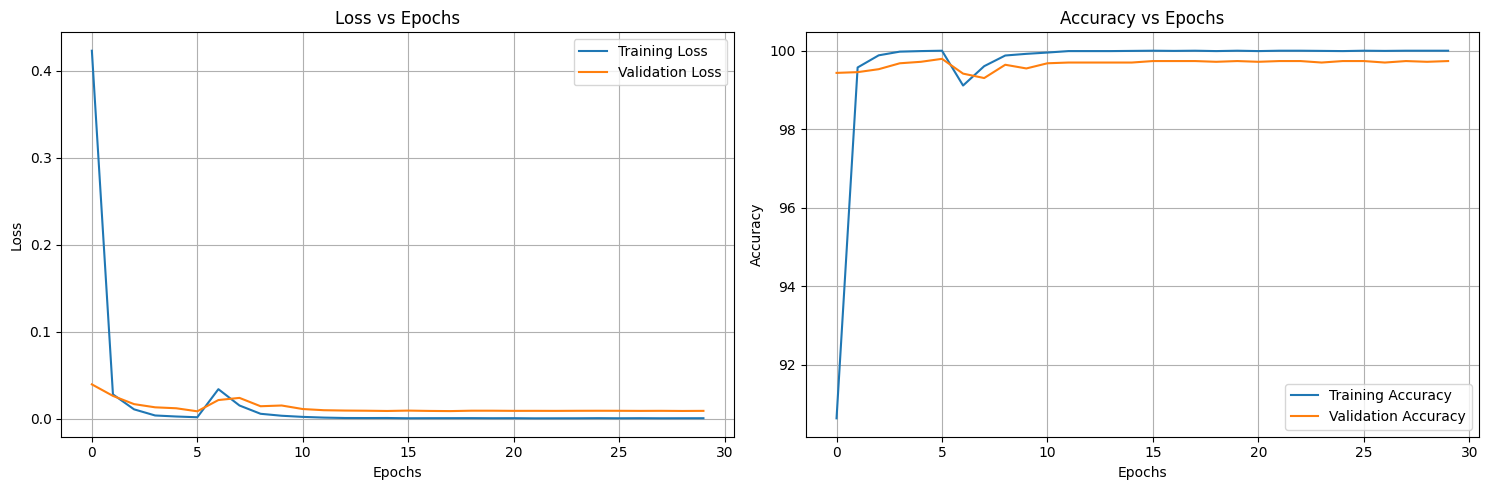

In [ ]:
# Graphs for loss vs epoch and accuracy vs epoch
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot losses vs epochs
ax1.plot(train_losses_sa, label='Training Loss')
ax1.plot(val_losses_sa, label='Validation Loss')
ax1.set_title('Loss vs Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plot accuracies vs epochs
ax2.plot(train_accuracies_sa, label='Training Accuracy')
ax2.plot(val_accuracies_sa, label='Validation Accuracy')
ax2.set_title('Accuracy vs Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

Test Set Results:
Test Loss: 0.100
Test Accuracy: 97.03%
Precision: 0.971
Recall: 0.970
F1-Score: 0.970


Confusion Matrix:



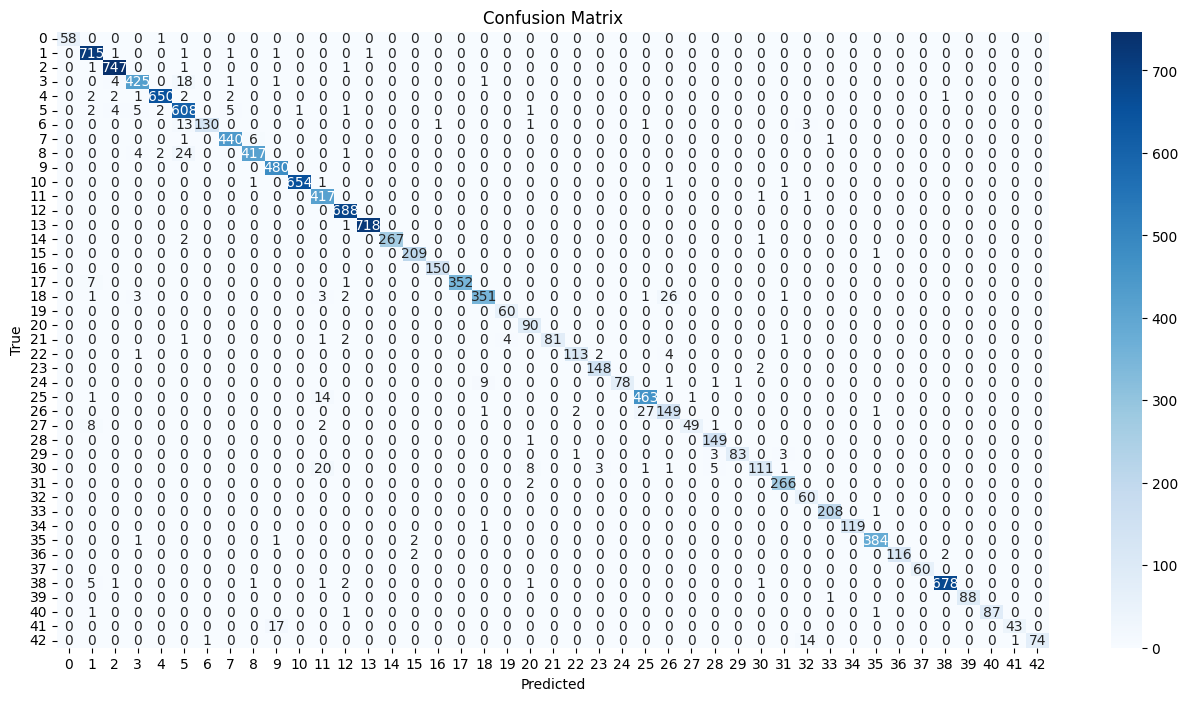

In [ ]:
# Testing the model
# Creating a test dataloader
test_loader = DataLoader(
        test_dataset,
        batch_size=64,
        shuffle=False,
        num_workers=4,
        drop_last=True
    )

# Loading the best model weights
model = GTSRBModelWithAttention()
model.load_state_dict(torch.load('best_model_sa.pth'))

# Test the model
test_model(model, test_loader)

## 4. Result and Interpretation

#### **Training and Validation Results Analysis:**
- Training Loss: 0.001 indicates excellent model convergence
- Training Accuracy: 100% shows strong learning capability
- Validation Accuracy: 99.79% slightly higher than training accuracy, suggesting optimal generalization
- Validation Metrics:
  - Precision: 0.997
  - Recall: 0.997
  - F1-Score: 0.997
- Identical validation metrics indicate balanced performance across all classes

#### **Test Set Performance Analysis:**
- Test Accuracy: 97.03% demonstrates robust real-world performance
- Test Loss: 0.100 shows reasonable generalization gap
- Test Metrics:
  - Precision: 0.971
  - Recall: 0.970
  - F1-Score: 0.970
- Nearly identical test metrics suggest balanced prediction capabilities
- Moderate performance drop from validation to test set is within expected range

#### **Model Interpretability:**

Convolutional Neural Network (CNN) + Spatial Self-Attention mechanism:

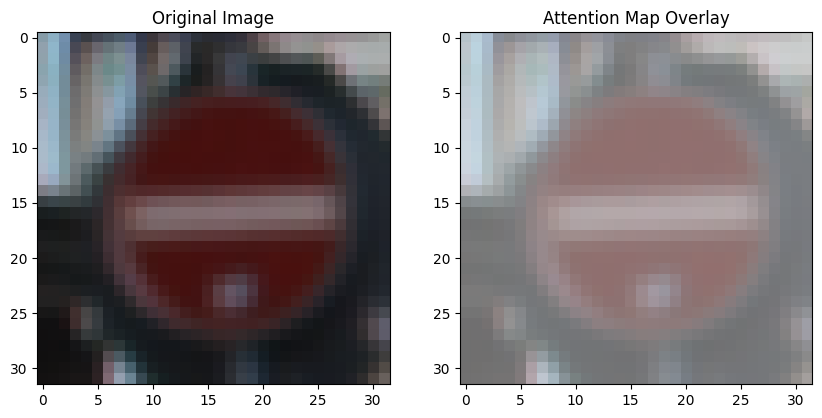

The comparison between the original traffic sign image (left) and its attention map overlay (right) shows how the model makes its predictions. The attention map visualization highlights that the model focuses on key features while also giving less importance to the dark background areas. The model's decision-making process shows that it prioritizes relevant features for classification similar to human reasoning, validating that its predictions are based on meaningful characteristics of the traffic sign rather than arbitrary patterns.


#### **Business Insights:**
- Apply Internationally: Same approach could be used with any country's signs.
- Autonomous Vehicles: Accurate and reliable traffic sign detection for self-driving cars.
- Reduce the possibility of accidents caused by overlooking traffic signs.
- ADAS: Integrating into Advanced Driver Assistance Systems (ADAS) can notify divers of traffic sign.
- Traffic Sign Assessment: The model can detect damaged or missing traffic signs.